In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## Exercise 1

### **Exploring Class Separability in 2D**

Understanding how data is distributed is the first step before designing a network architecture. In this exercise, you will generate and visualize a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

### **Instructions**

1.  **Generate the Data:** Create a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each). Use a Gaussian distribution to generate the points for each class based on the following parameters:
    * **Class 0:** Mean = $[2, 3]$, Standard Deviation = $[0.8, 2.5]$
    * **Class 1:** Mean = $[5, 6]$, Standard Deviation = $[1.2, 1.9]$
    * **Class 2:** Mean = $[8, 1]$, Standard Deviation = $[0.9, 0.9]$
    * **Class 3:** Mean = $[15, 4]$, Standard Deviation = $[0.5, 2.0]$
1.  **Plot the Data:** Create a 2D scatter plot showing all the data points. Use a different color for each class to make them distinguishable.
1.  **Analyze and Draw Boundaries:**
    1. Examine the scatter plot carefully. Describe the distribution and overlap of the four classes.
    1. Based on your visual inspection, could a simple, linear boundary separate all classes?
    1. On your plot, sketch the decision boundaries that you think a trained neural network might learn to separate these classes.

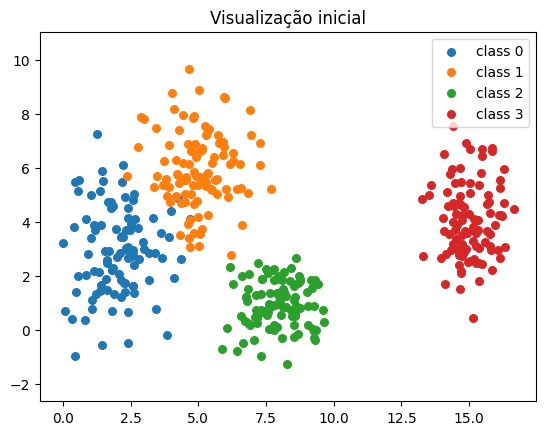

In [14]:
parameters = (
    ((2,3), (0.8, 2.5)),
    ((5, 6), (1.2, 1.9)),
    ((8, 1), (0.9, 0.9)),
    ((15, 4), (0.5, 2.0))
)

i = 0
while i < len(parameters):
    p = parameters[i]
    mean = p[0]
    cov = np.diag(p[1])  
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    plt.scatter(x, y, s=30, label=f'class {i}')
    i += 1


plt.title("Visualização inicial")
plt.axis('equal')
plt.legend()
plt.show()

As classes estão separadas mas de forma que uma única linha não consegue separar. Para isso seria necessário mais linhas> segue:

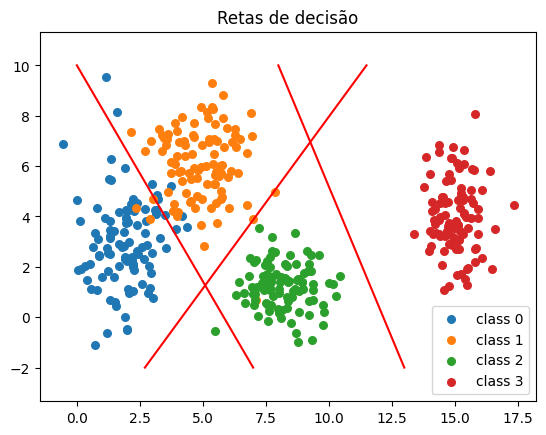

In [49]:
i = 0
while i < len(parameters):
    p = parameters[i]
    mean = p[0]
    cov = np.diag(p[1])  
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    plt.scatter(x, y, s=30, label=f'class {i}')
    i += 1


plt.title("Retas de decisão")
plt.plot([0, 7], [10, -2], color='red')
plt.plot([8, 13], [10, -2], color='red')
plt.plot([2.7, 11.5], [-2, 10], color='red')
plt.axis('equal')
plt.legend()
plt.show()

Dessa maneira, com 3 neurônios, temos três linhas, e assim conseguimos separar as classes de maneira mais adequada.

## Exercise 2

### **Non-Linearity in Higher Dimensions**

Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges you to create and visualize such a dataset.

### **Instructions**

1.  **Generate the Data:** Create a dataset with 500 samples for Class A and 500 samples for Class B. Use a multivariate normal distribution with the following parameters:

    * **Class A:**

        Mean vector:

        $$\mu_A = [0, 0, 0, 0, 0]$$

        Covariance matrix:

        $$
        \Sigma_A = \begin{pmatrix}
        1.0 & 0.8 & 0.1 & 0.0 & 0.0 \\
        0.8 & 1.0 & 0.3 & 0.0 & 0.0 \\
        0.1 & 0.3 & 1.0 & 0.5 & 0.0 \\
        0.0 & 0.0 & 0.5 & 1.0 & 0.2 \\
        0.0 & 0.0 & 0.0 & 0.2 & 1.0
        \end{pmatrix}
        $$

    * **Class B:**

        Mean vector:
            
        $$\mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]$$
        
        Covariance matrix:

        $$
        \Sigma_B = \begin{pmatrix}
        1.5 & -0.7 & 0.2 & 0.0 & 0.0 \\
        -0.7 & 1.5 & 0.4 & 0.0 & 0.0 \\
        0.2 & 0.4 & 1.5 & 0.6 & 0.0 \\
        0.0 & 0.0 & 0.6 & 1.5 & 0.3 \\
        0.0 & 0.0 & 0.0 & 0.3 & 1.5
        \end{pmatrix}
        $$

1.  **Visualize the Data:** Since you cannot directly plot a 5D graph, you must reduce its dimensionality.
    * Use a technique like **Principal Component Analysis (PCA)** to project the 5D data down to 2 dimensions.
    * Create a scatter plot of this 2D representation, coloring the points by their class (A or B).
1.  **Analyze the Plots:**
    1. Based on your 2D projection, describe the relationship between the two classes.
    1. Discuss the **linear separability** of the data. Explain why this type of data structure poses a challenge for simple linear models and would likely require a multi-layer neural network with non-linear activation functions to be classified accurately.


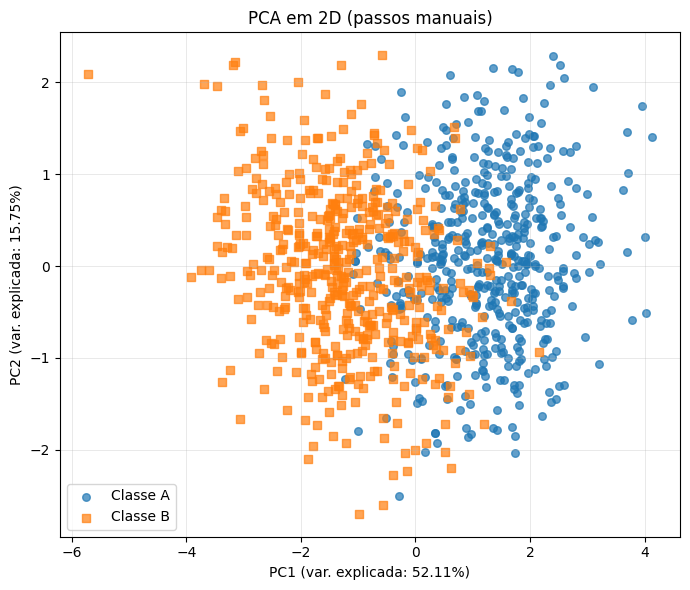

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

parameters = [
    (
        [0, 0, 0, 0, 0],
        [
            [1.0, 0.8, 0.1, 0.0, 0.0],
            [0.8, 1.0, 0.3, 0.0, 0.0],
            [0.1, 0.3, 1.0, 0.5, 0.0],
            [0.0, 0.0, 0.5, 1.0, 0.2],
            [0.0, 0.0, 0.0, 0.2, 1.0]
        ]
    ),
    (
        [1.5, 1.5, 1.5, 1.5, 1.5],
        [
            [1.5, -0.7, 0.2, 0.0, 0.0],
            [-0.7, 1.5, 0.4, 0.0, 0.0],
            [0.2, 0.4, 1.5, 0.6, 0.0],
            [0.0, 0.0, 0.6, 1.5, 0.3],
            [0.0, 0.0, 0.0, 0.3, 1.5]
        ]
    )
]

n_per_class = 500
data_list = []
labels = []

for i, (mean, cov) in enumerate(parameters):
    X = np.random.multivariate_normal(mean, cov, size=n_per_class)
    data_list.append(X)
    labels.append(np.full(n_per_class, i))

X = np.vstack(data_list)        
y = np.concatenate(labels)       

mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=0)  
X_std = (X - mu) / sigma

n = X_std.shape[0]
C = (X_std.T @ X_std) / n

eigvals, eigvecs = np.linalg.eig(C)  
eigvals = eigvals.real
eigvecs = eigvecs.real

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

k = 2
W = eigvecs[:, :k]             
Y = X_std @ W                   

explained_var_ratio = eigvals / eigvals.sum()
evr1, evr2 = explained_var_ratio[:2]

plt.figure(figsize=(7, 6))
for cls, name, marker in [(0, "Classe A", "o"), (1, "Classe B", "s")]:
    plt.scatter(Y[y == cls, 0], Y[y == cls, 1], label=name, alpha=0.7, s=30, marker=marker)

plt.xlabel(f"PC1 (var. explicada: {evr1:.2%})")
plt.ylabel(f"PC2 (var. explicada: {evr2:.2%})")
plt.title("PCA em 2D (passos manuais)")
plt.legend()
plt.grid(True, linewidth=0.4, alpha=0.5)
plt.tight_layout()
plt.show()


As duas classes apresentam alguma separação no eixo PC1, mas com forte sobreposição no centro. Isso significa que os dados não são linearmente separáveis, dificultando a classificação por modelos lineares simples; para lidar com essa estrutura seria necessário usar modelos com não linearidade

## Exercise 3

### **Preparing Real-World Data for a Neural Network**

This exercise uses a real dataset from Kaggle. Your task is to perform the necessary preprocessing to make it suitable for a neural network that uses the hyperbolic tangent (`tanh`) activation function in its hidden layers.

### **Instructions**

1.  **Get the Data:** Download the [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic){:target="_blank"} dataset from Kaggle.
2.  **Describe the Data:**
    * Briefly describe the dataset's objective (i.e., what does the `Transported` column represent?).
    * List the features and identify which are **numerical** (e.g., `Age`, `RoomService`) and which are **categorical** (e.g., `HomePlanet`, `Destination`).
    * Investigate the dataset for **missing values**. Which columns have them, and how many?
3.  **Preprocess the Data:** Your goal is to clean and transform the data so it can be fed into a neural network. The `tanh` activation function produces outputs in the range `[-1, 1]`, so your input data should be scaled appropriately for stable training.
    * **Handle Missing Data:** Devise and implement a strategy to handle the missing values in all the affected columns. Justify your choices.
    * **Encode Categorical Features:** Convert categorical columns like `HomePlanet`, `CryoSleep`, and `Destination` into a numerical format. One-hot encoding is a good choice.
    * **Normalize/Standardize Numerical Features:** Scale the numerical columns (e.g., `Age`, `RoomService`, etc.). Since the `tanh` activation function is centered at zero and outputs values in `[-1, 1]`, **Standardization** (to mean 0, std 1) or **Normalization** to a `[-1, 1]` range are excellent choices. Implement one and explain why it is a good practice for training neural networks with this activation function.
4.  **Visualize the Results:**
    * Create histograms for one or two numerical features (like `FoodCourt` or `Age`) **before** and **after** scaling to show the effect of your transformation.


In [9]:
df = pd.read_csv("data/train.csv")

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Após a colisão da nave com uma anomalia no espaço-tempo, alguns passageiros foram transportados para outra dimensão. A tarefa é prever quem foi transportado (target: Transported) com base nos registros pessoais.

**Variáveis Numéricas**

* Age: idade do passageiro (contínua).

* RoomService: gastos no serviço de quarto.

* FoodCourt: gastos no restaurante/lanchonete.

* ShoppingMall: gastos no shopping.

* Spa: gastos no spa.

* VRDeck: gastos no deck de realidade virtual.


**Variáveis Categóricas**

* PassengerId: identificador único (formato grupo + pessoa).

* HomePlanet: planeta de origem.

* CryoSleep: se estava em animação suspensa (True/False).

* Cabin: cabine (deck/número/side).

* Destination: planeta de destino.

* VIP: passageiro VIP (True/False).

* Name: nome completo.

* Transported: alvo/variável de saída (True/False).

In [11]:
print(df.isnull().sum())


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


/tmp/ipykernel_9240/3894202114.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


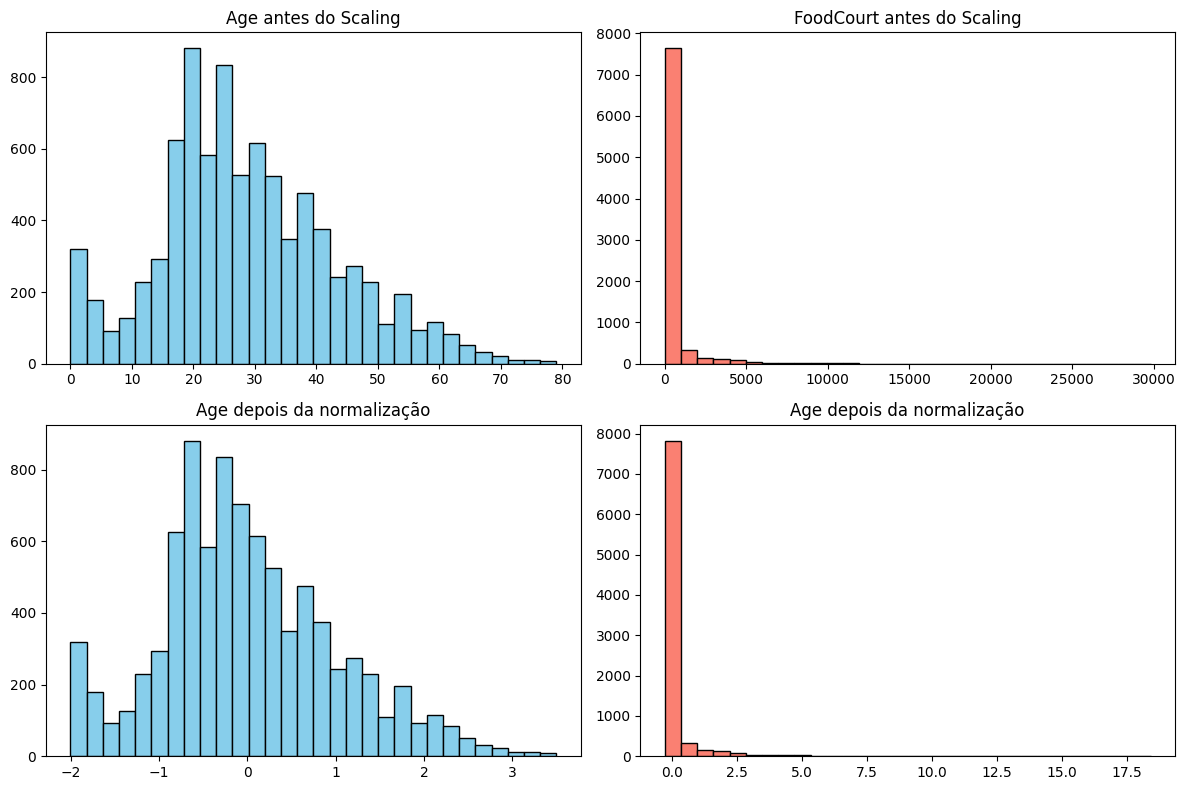

In [ ]:
df_clean = df.drop(columns=["PassengerId", "Name", "Cabin"])

# Tratar missing values
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# One-hot encoding manual das variáveis categóricas
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=False)

# Converter target para {-1, 1}
df_encoded["Transported"] = df_encoded["Transported"].map({True: 1, False: -1})

# Padronizar numéricos
for col in num_cols:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].hist(df["Age"].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0,0].set_title("Age antes do Scaling")
axes[0,1].hist(df["FoodCourt"].dropna(), bins=30, color='salmon', edgecolor='black')
axes[0,1].set_title("FoodCourt antes do Scaling")

axes[1,0].hist(df_encoded["Age"], bins=30, color='skyblue', edgecolor='black')
axes[1,0].set_title("Age depois da normalização")
axes[1,1].hist(df_encoded["FoodCourt"], bins=30, color='salmon', edgecolor='black')
axes[1,1].set_title("Age depois da normalização")

plt.tight_layout()
plt.show()

In [14]:
df_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.711904,-0.333085,-0.281011,-0.283562,-0.270610,-0.262988,-1,False,True,False,True,False,False,False,True,True,False
1,-0.334018,-0.168064,-0.275371,-0.241757,0.217146,-0.224192,1,True,False,False,True,False,False,False,True,True,False
2,2.036740,-0.267985,1.959885,-0.283562,5.695295,-0.219783,-1,False,True,False,True,False,False,False,True,False,True
3,0.293535,-0.333085,0.522980,0.336832,2.687022,-0.092813,-1,False,True,False,True,False,False,False,True,True,False
4,-0.891844,0.125645,-0.237145,-0.031057,0.231361,-0.261225,1,True,False,False,True,False,False,False,True,True,False
